# Laborator 5 - Introducere în Scikit-learn

În acest laborator vom face primii pași în utilizarea bibliotecii `scikit-learn`, una dintre cele mai populare biblioteci Python pentru probleme de **învățare automată** (*machine learning*).

Scopul nostru este să înțelegem cum să aplicăm modele simple pentru două tipuri fundamentale de probleme:

- **Clasificare**: problema în care dorim să atribuim o etichetă (categorie) unui exemplu.  
  Exemple:  
  - Determinarea dacă un e-mail este *spam* sau *non-spam*.
  - Prezicerea speciei unei flori pe baza lungimii și lățimii petalelor.

- **Regresie**: problema în care dorim să prezicem o valoare numerică continuă.  
  Exemple:  
  - Prezicerea prețului unei case în funcție de suprafață și locație.
  - Estimarea temperaturii în funcție de ora din zi.

Pe parcursul laboratorului vom:

- Înțelege diferența dintre clasificare și regresie.
- Învăța cum să pregătim datele pentru modele simple.
- Antrena modele folosind `scikit-learn`.
- Evalua performanța modelelor.

Acest laborator nu presupune cunoștințe avansate de matematică sau de învățare automată — vom învăța pas cu pas, prin exemple practice.


# Pașii de bază într-un proiect de învățare automată

În general, un proiect de clasificare sau regresie urmează câțiva pași esențiali:

1. **Încărcarea și explorarea datelor**  
   - Ne uităm la datele disponibile: ce variabile avem, ce vrem să prezicem.
   - Putem folosi funcții precum `pandas.read_csv()` pentru încărcare și `df.head()` pentru inspecție rapidă.

2. **Împărțirea datelor**  
   - Separăm datele în două seturi:
     - **Set de antrenament**: pentru a construi modelul.
     - **Set de testare**: pentru a evalua modelul pe date noi, nevăzute.
   - Funcția `train_test_split` din `scikit-learn` ne ajută în acest pas.

3. **Alegerea unui model**  
   - Pentru clasificare: putem folosi modele ca `KNeighborsClassifier`, `DecisionTreeClassifier`, `LogisticRegression` etc.
   - Pentru regresie: putem folosi `LinearRegression`, `DecisionTreeRegressor` etc.

4. **Antrenarea modelului**  
   - Modelul "învață" din datele de antrenament folosind metoda `fit`.

5. **Prezicerea rezultatelor**  
   - Aplicăm modelul pe datele de test folosind metoda `predict`.

6. **Evaluarea performanței**  
   - Pentru clasificare: folosim acuratețea (`accuracy_score`) sau alte metrici (precizie, recall).
   - Pentru regresie: folosim erori precum eroarea pătratică medie (`mean_squared_error`).


# Exemplul 1: Problema de clasificare - Clasificarea florilor Iris

Vom folosi unul dintre cele mai cunoscute seturi de date incluse în `scikit-learn`: **Iris dataset**.

Acest set de date conține informații despre trei specii de flori (*setosa*, *versicolor*, *virginica*), iar scopul este să prezicem specia unei flori în funcție de măsurătorile petalelor și sepalei.

---

## 1. Încărcarea datelor

Folosim `datasets.load_iris()` din `scikit-learn`.

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


## 2. Explorarea datelor

In [ ]:
import pandas as pd

# Punem datele într-un DataFrame pentru o vizualizare mai ușoară
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Afișăm primele 5 linii
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 3. Împărțirea datelor în antrenament și test

In [ ]:
from sklearn.model_selection import train_test_split

# Împărțim datele: 80% pentru antrenament, 20% pentru test
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=42)

print(f"Dimensiunea setului de antrenament: {X_train.shape}")
print(f"Dimensiunea setului de test: {X_test.shape}")

Dimensiunea setului de antrenament: (120, 4)
Dimensiunea setului de test: (30, 4)


## 4. Alegerea și antrenarea unui model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Creăm modelul
model = KNeighborsClassifier(n_neighbors=3)

# Antrenăm modelul pe setul de antrenament
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## 5. Prezicerea rezultatelor

In [ ]:
# Prezicem speciile pentru datele de test
y_pred = model.predict(X_test)

# Vedem primele 5 predicții
print("Predicții:", y_pred[:5])
print("Adevărate:", y_test[:5])

Predicții: [1 0 2 1 1]
Adevărate: [1 0 2 1 1]


## 6. Evaluarea performanței

In [ ]:
from sklearn.metrics import accuracy_score

# Evaluăm performanța
accuracy = accuracy_score(y_test, y_pred)
print(f"Acuratețea modelului: {accuracy:.2f}")

Acuratețea modelului: 1.00


# Exemplul 2: Problemă de regresie - Prezicerea prețului unui apartament

Vom folosi un set de date disponibil în `scikit-learn`: **California Housing dataset**.

Acest set de date conține informații despre diverse caracteristici ale cartierelor din California, iar scopul este să prezicem **prețul mediu al locuințelor** pe baza caracteristicilor acestora.

## 1. Încărcarea datelor

Folosim `datasets.fetch_california_housing()` pentru a încărca setul de date.


In [ ]:
from sklearn import datasets

# Încărcăm datele
housing = datasets.fetch_california_housing()

# Ce conține datasetul?
print(housing.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


## 2. Explorarea datelor

In [ ]:
import pandas as pd

# Punem datele într-un DataFrame pentru o vizualizare mai ușoară
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['price'] = housing.target

# Afișăm primele 5 linii
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 3. Împărțirea datelor în antrenament și test

In [ ]:
from sklearn.model_selection import train_test_split

# Împărțim datele: 80% pentru antrenament, 20% pentru test
X_train, X_test, y_train, y_test = train_test_split(
    housing.data, housing.target, test_size=0.2, random_state=42)

print(f"Dimensiunea setului de antrenament: {X_train.shape}")
print(f"Dimensiunea setului de test: {X_test.shape}")

Dimensiunea setului de antrenament: (16512, 8)
Dimensiunea setului de test: (4128, 8)


4. Alegerea și antrenarea unui model

In [ ]:
from sklearn.linear_model import LinearRegression

# Creăm modelul
model = LinearRegression()

# Antrenăm modelul pe setul de antrenament
model.fit(X_train, y_train)

LinearRegression()

5. Prezicerea rezultatelor

In [ ]:
# Prezicem prețurile pentru datele de test
y_pred = model.predict(X_test)

# Vedem primele 5 predicții
print("Predicții:", y_pred[:5])
print("Adevărate:", y_test[:5])

Predicții: [0.71912284 1.76401657 2.70965883 2.83892593 2.60465725]
Adevărate: [0.477   0.458   5.00001 2.186   2.78   ]


6. Evaluarea performanței

In [ ]:
from sklearn.metrics import mean_squared_error

# Calculăm eroarea pătratică medie
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 0.56


# Problemă propusă

## Setul de date Titanic

Setul de date **Titanic** conține informații despre pasagerii navei RMS Titanic și este folosit frecvent în probleme de clasificare pentru a prezice supraviețuirea pasagerilor pe baza unor caracteristici ale acestora, precum vârsta, sexul, clasa biletului și altele.

Setul de date este disponibil în biblioteca **seaborn** și conține următoarele coloane:

### Caracteristici:
- **survived**: Dacă pasagerul a supraviețuit (1) sau nu (0).
- **pclass**: Clasa în care se afla pasagerul (1, 2, 3).
- **sex**: Sexul pasagerului (male, female).
- **age**: Vârsta pasagerului (poate fi necunoscută).
- **sibsp**: Numărul de frați sau surori/soți care călătoreau împreună cu pasagerul.
- **parch**: Numărul de părinți sau copii care călătoreau cu pasagerul.
- **fare**: Prețul biletului plătit de pasager.
- **embarked**: Portul de îmbarcare al pasagerului:
  - C = Cherbourg
  - Q = Queenstown
  - S = Southampton

### Obiectiv:
Scopul este să prezicem dacă un pasager a supraviețuit sau nu, pe baza caracteristicilor sale.

---

## Cerințele laboratorului

### 1. **Încărcarea și explorarea datelor**
- Încarcă setul de date Titanic folosind `seaborn`.
- Vizualizează primele 5 rânduri din setul de date.
- Identificăm coloanele care au valori lipsă și analizează ce ar trebui făcut pentru a le trata.

In [ ]:
import seaborn as sns
import pandas as pd

# 1. Încărcăm setul de date Titanic
titanic = sns.load_dataset('titanic')

# 2. Vizualizăm primele 5 rânduri din setul de date
titanic.head()

# 3. Identificăm coloanele care au valori lipsă
# TODO 1

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 2. **Preprocesarea datelor**
- Completează valorile lipsă pentru coloanele `age` și `embarked` (dacă există).
   - **Pentru coloana `age`**, vom înlocui valorile lipsă cu valoarea medie a acelei coloane. Poți folosi funcția `fillna()` din pandas pentru a înlocui valorile lipsă. De asemenea, poți calcula media cu ajutorul funcției `mean()` din pandas.
  
    **Hint pentru `age`:**
    - Folosește `df['age'].mean()` pentru a calcula media vârstei.
    - Apoi, completează valorile lipsă cu `df['age'].fillna(df['age'].mean(), inplace=True)`.

  - **Pentru coloana `embarked`**, vom înlocui valorile lipsă cu valoarea cea mai frecventă (mode) din acea coloană. În acest caz, poți folosi funcția `mode()` pentru a obține valoarea cea mai frecventă.
  
    **Hint pentru `embarked`:**
    - Folosește `df['embarked'].mode()[0]` pentru a obține valoarea cea mai frecventă din coloana `embarked`.
    - Apoi, completează valorile lipsă cu `df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)`.

- Aplică tehnici de preprocesare pentru variabilele categorice, cum ar fi **One-Hot Encoding** pentru coloana `embarked` și **Label Encoding** pentru `sex`.

- **One-Hot Encoding pentru `embarked`:**
    One-Hot Encoding este o tehnică care convertește variabilele categorice în variabile binare (0 sau 1), creând o coloană separată pentru fiecare categorie. De exemplu, dacă coloana `embarked` conține valorile `C`, `Q`, și `S`, vor fi create 3 coloane: `embarked_C`, `embarked_Q`, și `embarked_S`.

    **Hint pentru One-Hot Encoding:**
    - Poți folosi funcția `get_dummies()` din pandas pentru a aplica One-Hot Encoding.
    
    **Exemplu de cod:**
    ```python
    import pandas as pd
    # Aplică One-Hot Encoding pe coloana 'embarked'
    df_encoded = pd.get_dummies(df, columns=['embarked'], drop_first=True)
    ```

    Explicație:
    - `drop_first=True` elimină prima coloană pentru a evita colinearitatea (adică pentru a preveni redundanța informației). Acest lucru este important în modele de regresie, dar nu este necesar pentru toate modelele.

  - **Label Encoding pentru `sex`:**
    Label Encoding este o tehnică care atribuie o valoare numerică (de obicei 0 sau 1) fiecărei categorii dintr-o coloană. De exemplu, în cazul coloanei `sex`, putem transforma valorile `male` și `female` în `0` și respectiv `1`.

    **Hint pentru Label Encoding:**
    - Poți folosi funcția `LabelEncoder` din `sklearn` pentru a aplica Label Encoding.

    **Exemplu de cod:**
    ```python
    from sklearn.preprocessing import LabelEncoder
    encoder = LabelEncoder()
    # Aplică Label Encoding pe coloana 'sex'
    df['sex'] = encoder.fit_transform(df['sex'])
    ```

    Explicație:
    - `fit_transform()` ajustează encoder-ul pe datele din coloana `sex` și le transformă în valori numerice.
    - Aceasta va transforma, de exemplu, `male` în `0` și `female` în `1`.

Aceste tehnici sunt foarte utile pentru a transforma variabilele categorice într-un format numeric pe care modelele de machine learning îl pot utiliza.

- Normalizează sau standardizează variabilele numerice, dacă este necesar.

- **Normalizarea** se referă la scalarea valorilor variabilelor numerice astfel încât să fie într-un interval specificat, de obicei între 0 și 1. Acest lucru este util atunci când variabilele au scări foarte diferite și vrei să le aduci într-o gamă similară.

    **Hint pentru Normalizare:**
    - Poți folosi `MinMaxScaler` din `sklearn.preprocessing` pentru a normaliza datele.

    **Exemplu de cod:**
    ```python
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    # Normalizează coloanele numerice
    df[['age', 'fare']] = scaler.fit_transform(df[['age', 'fare']])
    ```

    Explicație:
    - `fit_transform()` aplică normalizarea pe coloanele selectate (în acest caz, `age` și `fare`).
    - După aplicarea normalizării, valorile vor fi între 0 și 1.

  - **Standardizarea** presupune transformarea valorilor astfel încât să aibă o medie de 0 și o abatere standard de 1. Aceasta este utilă când datele sunt distribuite normal și când modelele de machine learning sunt sensibile la scalele diferite ale caracteristicilor.

    **Hint pentru Standardizare:**
    - Poți folosi `StandardScaler` din `sklearn.preprocessing` pentru a standardiza datele.

    *Exemplu de cod:*
    ```python
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    # Standardizează coloanele numerice
    df[['age', 'fare']] = scaler.fit_transform(df[['age', 'fare']])
    ```

    Explicație:
    - `fit_transform()` aplică standardizarea pe coloanele selectate, iar după procesare, fiecare coloană va avea media 0 și abaterea standard 1.

### Când să folosești normalizarea sau standardizarea:
- **Normalizarea** este de obicei folosită atunci când vrei ca toate variabilele să fie într-un interval fix, de exemplu pentru algoritmi ca **K-Nearest Neighbors** sau **Rețele neuronale**.
- **Standardizarea** este adesea folosită pentru algoritmi care presupun o distribuție normală a datelor, cum ar fi **Regresia liniară**, **Support Vector Machines (SVM)** sau **PCA**.

Dacă datele tale au scări foarte diferite, este important să aplici aceste tehnici pentru a îmbunătăți performanța modelului.

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
df = titanic

# 1. Completează valorile lipsă pentru coloana 'age' cu media
df['age'] = 1.0 # TODO 2

# 2. Completează valorile lipsă pentru coloana 'embarked' cu valoarea cea mai frecventă (mode)
df['embarked'] = "S" # TODO 3

# 3. Aplică One-Hot Encoding pe coloana 'embarked'
df_encoded = pd.get_dummies(df, columns=['embarked'], drop_first=True)

# 4. Aplică Label Encoding pe coloana 'sex'
encoder = LabelEncoder()
df_encoded['sex'] = encoder.fit_transform(df_encoded['sex'])

# 5. Normalizarea variabilelor numerice 'age' și 'fare'
scaler = MinMaxScaler()
df_encoded[['age', 'fare']] = scaler.fit_transform(df_encoded[['age', 'fare']])

# 6. Standardizarea variabilelor numerice 'age' și 'fare'
scaler = StandardScaler()
df_encoded[['age', 'fare']] = scaler.fit_transform(df_encoded[['age', 'fare']])

# Vizualizează primele 5 rânduri după preprocesare
df_encoded.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,embarked_Q,embarked_S
0,0,3,1,-0.592481,1,0,-0.502445,Third,man,True,NaN,Southampton,no,False,False,True
1,1,1,0,0.638789,1,0,0.786845,First,woman,False,C,Cherbourg,yes,False,False,False
2,1,3,0,-0.284663,0,0,-0.488854,Third,woman,False,NaN,Southampton,yes,True,False,True
3,1,1,0,0.407926,1,0,0.420730,First,woman,False,C,Southampton,yes,False,False,True
4,0,3,1,0.407926,0,0,-0.486337,Third,man,True,NaN,Southampton,no,True,False,True



### 3. **Împărțirea datelor în seturi de antrenament și test**
- Împarte setul de date în două părți: un set de antrenament (80%) și un set de test (20%).
- Explică importanța acestei împărțiri pentru evaluarea corectă a modelului.

In [ ]:
from sklearn.model_selection import train_test_split

# Împărțirea datelor în seturi de antrenament (80%) și seturi de test (20%)
X = df_encoded.drop(columns=['survived', 'class', 'who', 'deck', 'embark_town', 'alive'], axis=1)  # Caracteristicile (fără coloana 'survived')
y = df_encoded['survived']  # Eticheta (variabila țintă)

X_train, X_test, y_train, y_test = None # TODO 4

# Verifică dimensiunile seturilor
print("Setul de antrenament X:", X_train.shape)
print("Setul de test X:", X_test.shape)
print("Setul de antrenament y:", y_train.shape)
print("Setul de test y:", y_test.shape)

Setul de antrenament X: (712, 10)
Setul de test X: (179, 10)
Setul de antrenament y: (712,)
Setul de test y: (179,)


### 4. **Alegerea și antrenarea unui model de clasificare**
- Alege un model de **regresie logistică** sau **K-Nearest Neighbors (KNN)** pentru a prezice supraviețuirea pasagerilor.
- Antrenează modelul folosind setul de date de antrenament.


Acuratețea modelului de regresie logistică: 0.81

Coeficienții modelului de regresie logistică:
pclass: -0.8669
sex: -0.4580
age: -0.1645
sibsp: -0.5419
parch: -0.3519
fare: 0.1553
adult_male: -2.5570
alone: -0.5012
embarked_Q: -0.1545
embarked_S: -0.3494


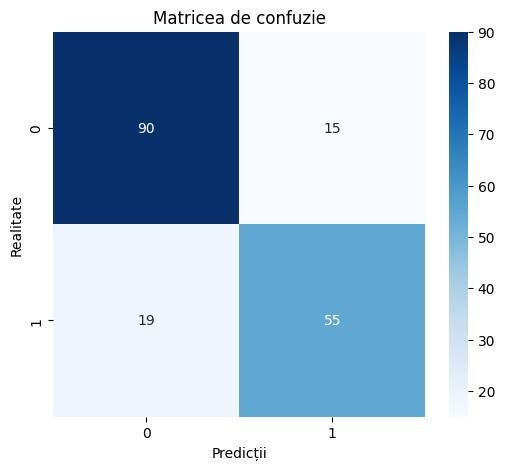

In [ ]:
from sklearn.linear_model import LogisticRegression

# Creează și antrenează modelul de regresie logistică
# model = TODO 5

# Antrenăm modelul
# TODO 6

# Prezicem etichetele pe setul de test
# y_pred = TODO 7

# Calculăm și afișăm acuratețea modelului
accuracy = accuracy_score(y_test, y_pred)
print(f"Acuratețea modelului de regresie logistică: {accuracy:.2f}")

# Afișăm coeficienții modelului pentru fiecare caracteristică (comentați aceste linii dacă folosiți alt tip de clasificator)
print("\nCoeficienții modelului de regresie logistică:")
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"{feature}: {coef:.4f}")

### 5. **Evaluarea performanței modelului**
- Calculează **acuratețea** modelului pe setul de test.
- Afișează **matricea de confuzie** pentru a analiza mai detaliat performanța modelului pe fiecare clasă.
- Explică cum poate fi interpretată matricea de confuzie.

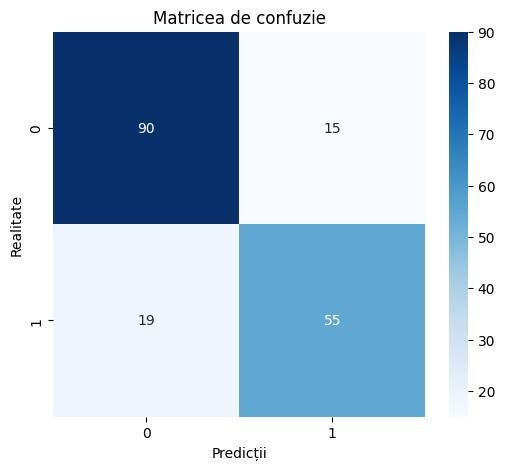

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Calculăm matricea de confuzie
cm = confusion_matrix(y_test, y_pred)

# Vizualizăm matricea de confuzie
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title("Matricea de confuzie")
plt.xlabel('Predicții')
plt.ylabel('Realitate')
plt.show()

### 6. **Vizualizarea rezultatelor**
- Creează un **scatter plot** sau **pair plot** folosind două dintre caracteristicile cele mai relevante (de exemplu, `age` și `fare`).
- Folosește culori diferite pentru a evidenția pasagerii care au supraviețuit față de cei care nu au supraviețuit.

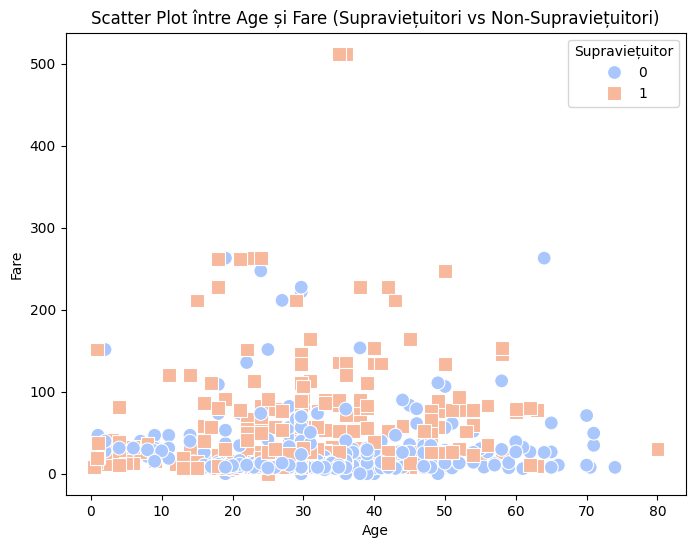

In [ ]:
# Alegem cele două caracteristici relevante: 'age' și 'fare'
plt.figure(figsize=(8, 6))

# Scatter plot cu culori diferite pentru supraviețuitori (1) și non-supraviețuitori (0)
sns.scatterplot(data=df, x='age', y='fare', hue='survived', palette='coolwarm', style='survived', markers={0: 'o', 1: 's'}, s=100)

# Setăm titlul și etichetele axelor
plt.title("Scatter Plot între Age și Fare (Supraviețuitori vs Non-Supraviețuitori)")
plt.xlabel('Age')
plt.ylabel('Fare')

# Afișăm legenda
plt.legend(title="Supraviețuitor", loc='best')

# Afișăm graficul
plt.show()

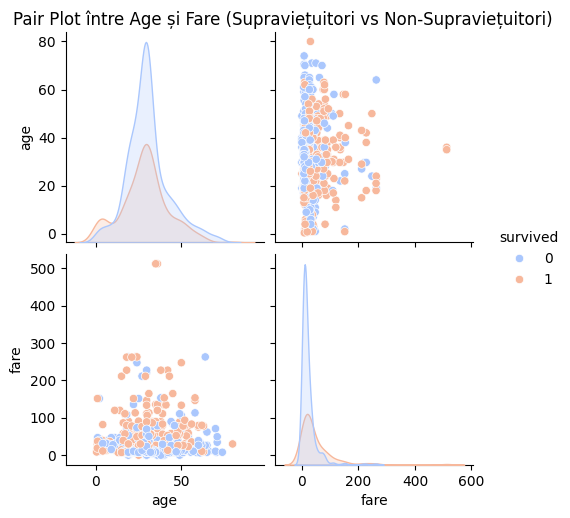

In [ ]:
# Creăm un pairplot cu 'age' și 'fare', colorat pe baza variabilei 'survived'
sns.pairplot(df[['age', 'fare', 'survived']], hue='survived', palette='coolwarm')

# Setăm titlul graficului
plt.suptitle("Pair Plot între Age și Fare (Supraviețuitori vs Non-Supraviețuitori)", y=1.02)

# Afișăm graficul
plt.show()

### 7. **Îmbunătățirea modelului**
- Înlocuiește modelul de **regresie logistică** cu un alt model de clasificare, de exemplu **Support Vector Machine (SVM)** sau **Random Forest**, și compară performanța acestora folosind aceleași metrici (acuratețea și matricea de confuzie).

Acuratețea modelului SVM: 0.80


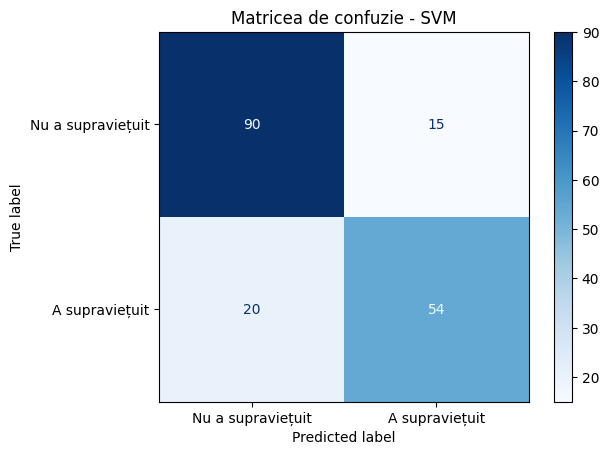

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Creează și antrenează modelul SVM
svm_model = SVC(kernel='linear')  # Alegem kernel liniar
svm_model.fit(X_train, y_train)  # Antrenăm modelul

# Prezicem etichetele pe setul de test
y_pred_svm = svm_model.predict(X_test)

# Calculăm și afișăm acuratețea modelului SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Acuratețea modelului SVM: {accuracy_svm:.2f}")

# Afișăm matricea de confuzie pentru modelul SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=["Nu a supraviețuit", "A supraviețuit"])
disp_svm.plot(cmap=plt.cm.Blues)
plt.title("Matricea de confuzie - SVM")
plt.show()

Acuratețea modelului Random Forest: 0.83


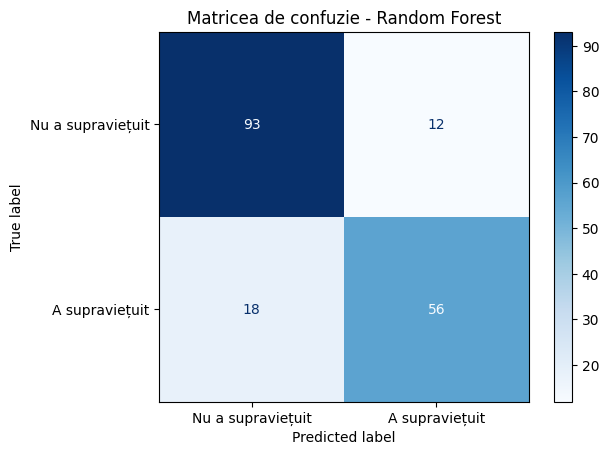

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Creează și antrenează modelul Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Setăm 100 de arbori
rf_model.fit(X_train, y_train)  # Antrenăm modelul

# Prezicem etichetele pe setul de test
y_pred_rf = rf_model.predict(X_test)

# Calculăm și afișăm acuratețea modelului Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Acuratețea modelului Random Forest: {accuracy_rf:.2f}")

# Afișăm matricea de confuzie pentru modelul Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Nu a supraviețuit", "A supraviețuit"])
disp_rf.plot(cmap=plt.cm.Blues)
plt.title("Matricea de confuzie - Random Forest")
plt.show()